In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submit = pd.read_csv('sample_submission.csv')

## STATISTICAL ANALYSIS (EDA)

In [6]:
y_train = df_train["exam_score"]
print(f"Train data: {df_train.shape}")
print(f"Test data: {df_test.shape}")
print(f"Target data: {df_submit.shape}")
print(f"\nTarget stats:")
print(df_train.describe())

print("="*30)
print(f"Target train y(exam score):\n {y_train}")

Train data: (630000, 13)
Test data: (270000, 12)
Target data: (270000, 2)

Target stats:
                  id            age    study_hours  class_attendance  \
count  630000.000000  630000.000000  630000.000000     630000.000000   
mean   314999.500000      20.545821       4.002337         71.987261   
std    181865.479132       2.260238       2.359880         17.430098   
min         0.000000      17.000000       0.080000         40.600000   
25%    157499.750000      19.000000       1.970000         57.000000   
50%    314999.500000      21.000000       4.000000         72.600000   
75%    472499.250000      23.000000       6.050000         87.200000   
max    629999.000000      24.000000       7.910000         99.400000   

         sleep_hours     exam_score  
count  630000.000000  630000.000000  
mean        7.072758      62.506672  
std         1.744811      18.916884  
min         4.100000      19.599000  
25%         5.600000      48.800000  
50%         7.100000      62.60000

In [7]:
df_train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [8]:
# Basic info 
print("Train Data dtypes: \n", df_train.dtypes)

print("="*30)

# Missing values 
print("\nMissing values \n", df_train.isnull().sum())

print("="*30)

# Target Variable (exam_score)
print("Target Variable (exam_score)")
print(f"Mean: {y_train.mean():.2f}")
print(f"Std: {y_train.std():.2f}")
print(f"Min: {y_train.min():.2f}")
print(f"Max: {y_train.max():.2f}")

# Categorical Variables Distribution
print("="*30)
print("Categorical Variables Distribution")
categorical_cols = ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_train[col].value_counts())

# Numerical Variables Distribution
print("="*30)
print("\n--- Numerical Variables Statistics ---")
numerical_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
print(df_train[numerical_cols].describe())

Train Data dtypes: 
 id                    int64
age                   int64
gender               object
course               object
study_hours         float64
class_attendance    float64
internet_access      object
sleep_hours         float64
sleep_quality        object
study_method         object
facility_rating      object
exam_difficulty      object
exam_score          float64
dtype: object

Missing values 
 id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64
Target Variable (exam_score)
Mean: 62.51
Std: 18.92
Min: 19.60
Max: 100.00
Categorical Variables Distribution

gender:
gender
other     211097
male      210593
female    208310
Name: count, dtype: int64

course:
course
b.tech     131236
b.sc       111554
b.com      110932
bca        

### Correlation with Target(exam score) 

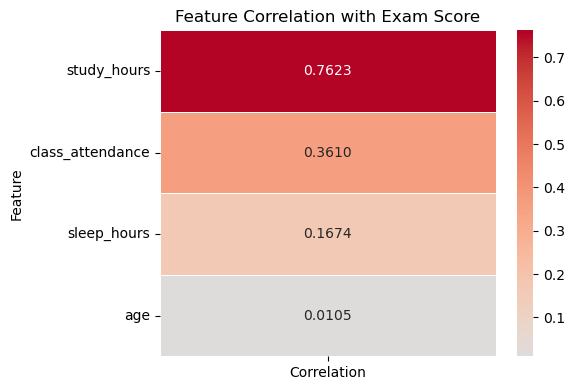

In [9]:
numerical_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours']
target = 'exam_score'
# Compute correlation with target
corrs = (
    df_train[numerical_cols]
    .corrwith(df_train[target])
    .to_frame(name='Correlation')
)
corrs = corrs.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(6, 4))
sns.heatmap(
    corrs,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".4f",
    linewidths=0.5,
    cbar=True
)

plt.title("Feature Correlation with Exam Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Categorical features vs a numeric target`exam_score`

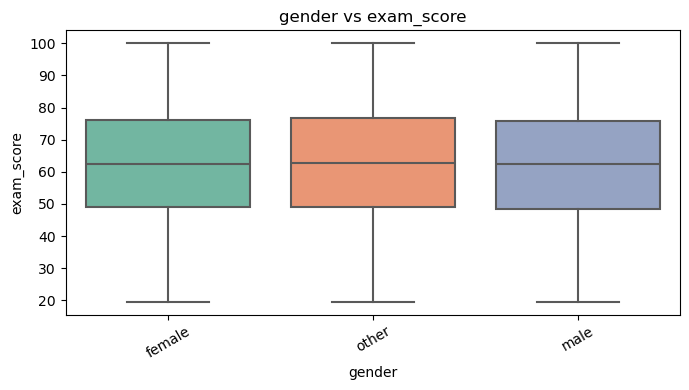

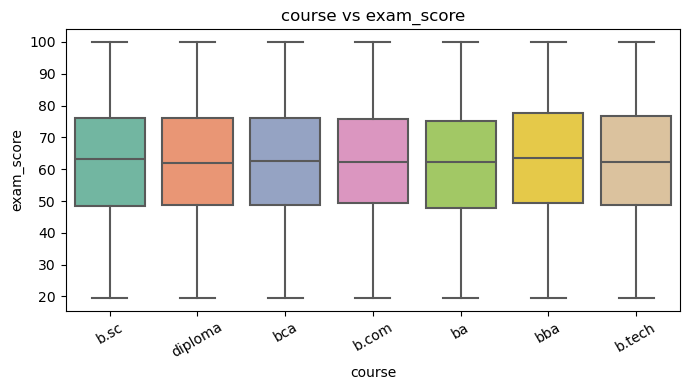

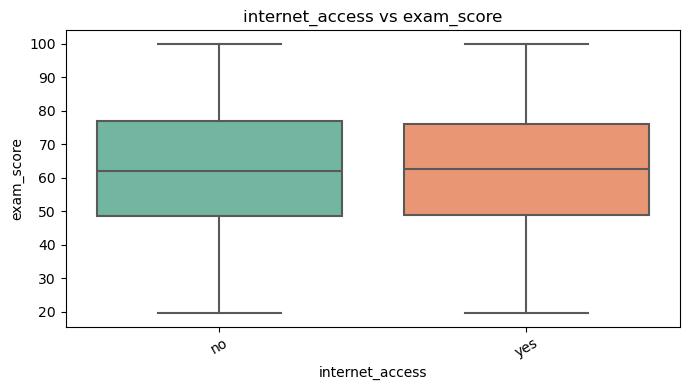

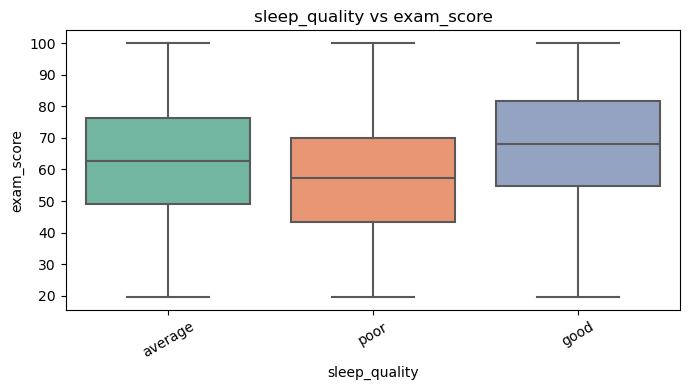

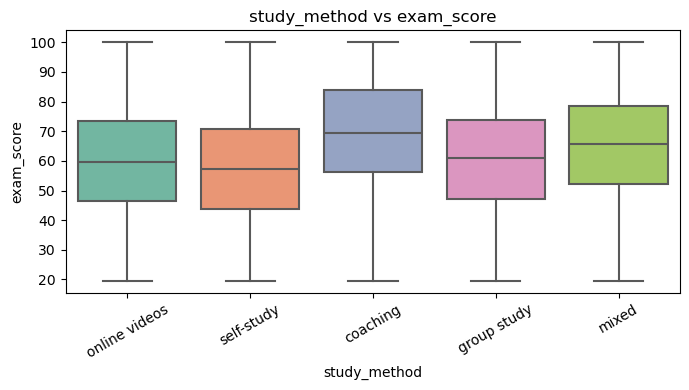

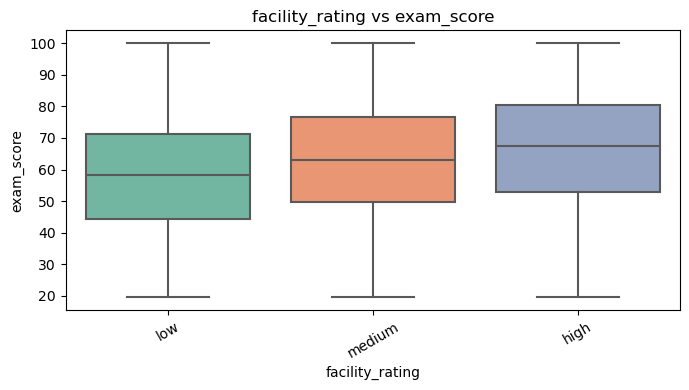

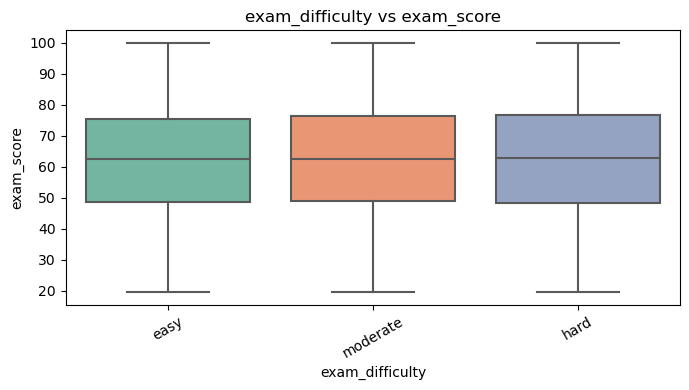

In [10]:
categorical_cols = [
    'gender', 'course', 'internet_access', 'sleep_quality',
    'study_method', 'facility_rating', 'exam_difficulty'
]

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(
        x=df_train[col],
        y=df_train[target],
        palette="Set2"
    )
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

### Mean target per category (Bar plot)

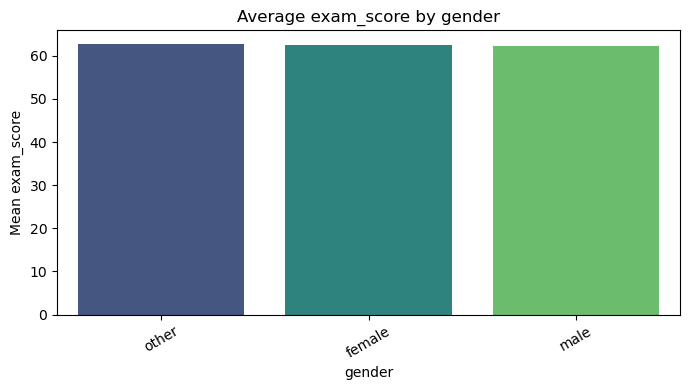

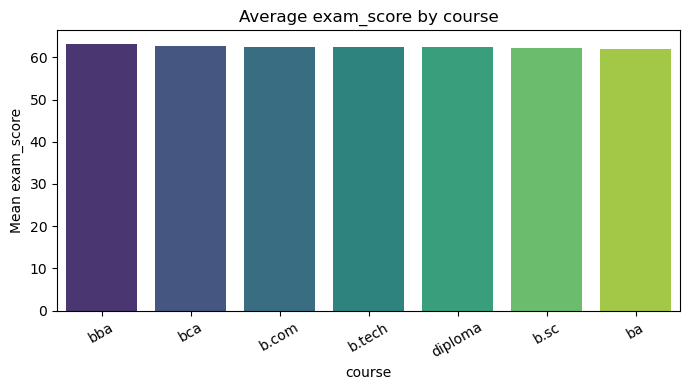

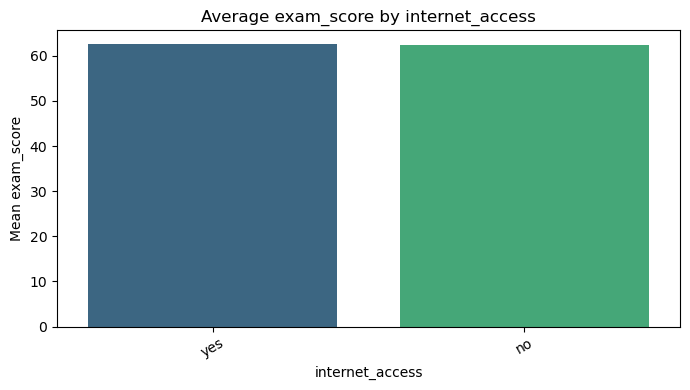

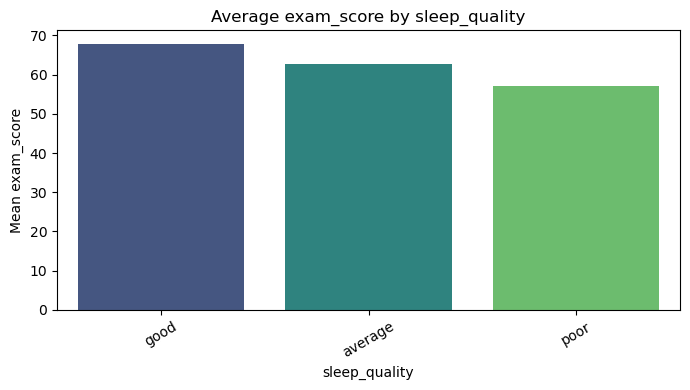

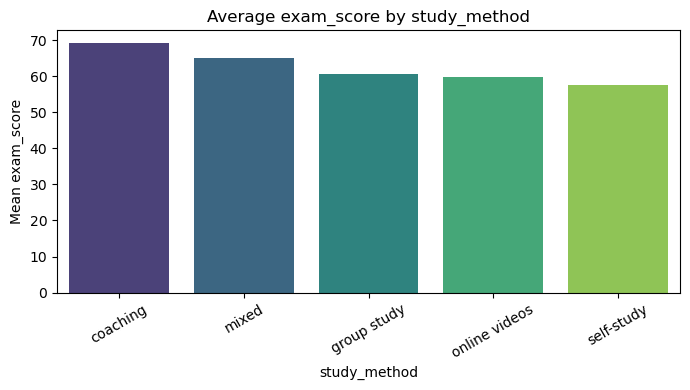

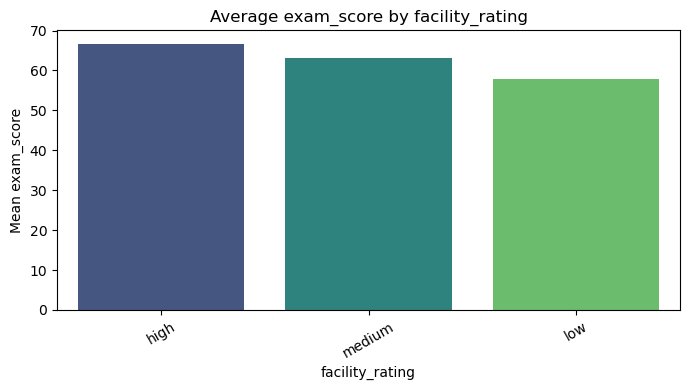

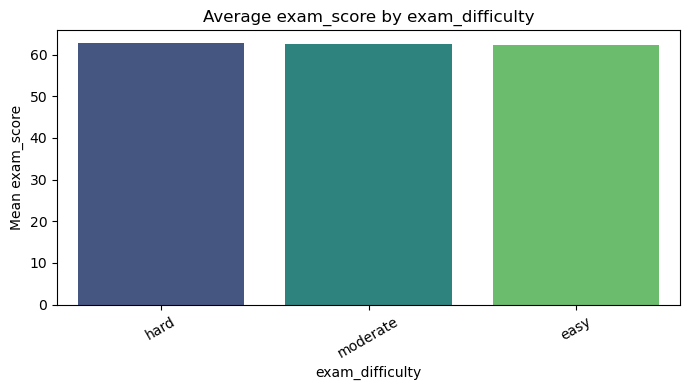

In [11]:
for col in categorical_cols:
    mean_scores = (
        df_train
        .groupby(col)[target]
        .mean()
        .sort_values(ascending=False)
    )

    plt.figure(figsize=(7, 4))
    sns.barplot(
        x=mean_scores.index,
        y=mean_scores.values,
        palette="viridis"
    )

    plt.title(f"Average {target} by {col}")
    plt.ylabel(f"Mean {target}")
    plt.xlabel(col)
    plt.xticks(rotation=30)

    plt.tight_layout()
    plt.show()

### Statistical Test such as t-test, ANOVA for categorical variables with target variable

In [12]:
from scipy.stats import ttest_ind, f_oneway

def categorical_significance_table(df, categorical_cols, target, alpha=0.05):
    rows = []

    for col in categorical_cols:
        data = df[[col, target]].dropna()
        groups = [g[target].values for _, g in data.groupby(col)]
        n_groups = len(groups)

        # Skip invalid cases
        if n_groups < 2:
            continue

        # Select appropriate test
        if n_groups == 2:
            stat, p = ttest_ind(groups[0], groups[1], equal_var=False)
            test_name = "Welch t-test"
        else:
            stat, p = f_oneway(*groups)
            test_name = "ANOVA"

        rows.append({
            "Feature": col,
            "Test Used": test_name,
            "Num Categories": n_groups,
            "p-value": round(p, 5),
            "Significant": "Yes" if p < alpha else "No"
        })

    return (
        pd.DataFrame(rows)
        .sort_values("p-value")
        .reset_index(drop=True)
    )


In [13]:
categorical_cols = [
    'gender', 'course', 'internet_access',
    'sleep_quality', 'study_method',
    'facility_rating', 'exam_difficulty'
]

# Summary table of test's result
summary_table = categorical_significance_table(
    df_train,
    categorical_cols,
    target='exam_score'
)

summary_table


,Feature,Test Used,Num Categories,p-value,Significant
0,gender,ANOVA,3,0.00000,Yes
1,course,ANOVA,7,0.00000,Yes
2,sleep_quality,ANOVA,3,0.00000,Yes
3,study_method,ANOVA,5,0.00000,Yes
4,facility_rating,ANOVA,3,0.00000,Yes
5,exam_difficulty,ANOVA,3,0.00000,Yes
6,internet_access,Welch t-test,2,0.72717,No


## Advance Feature Engineering

In [14]:
from sklearn.preprocessing import LabelEncoder
def create_features(df, is_train=True, target_encodings=None):
    """Create advanced features based on winning solution"""
    df = df.copy()
    numerical_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours']
    categorical_cols = [
        'gender', 'course', 'internet_access','sleep_quality', 'study_method',
        'facility_rating', 'exam_difficulty']

    # 1. Digit Features
    # Extract digits from numerical features
    for num in numerical_cols:
        df[f'{num}_decimal1'] = ((df[num] * 10) % 10).astype(int)
        # Integer part
        df[f'{num}_int'] = df[num].astype(int)

    # 2. CYCLICAL FEATURES
    # Age cyclical (treating as if it cycles in the range)
    df['age_sin'] = np.sin(2 * np.pi * df['age'] / 24)
    df['age_cos'] = np.cos(2 * np.pi * df['age'] / 24)

    # Sleep hours cyclical
    df['sleep_sin'] = np.sin(2 * np.pi * df['sleep_hours'] / 10)
    df['sleep_cos'] = np.cos(2 * np.pi * df['sleep_hours'] / 10)

    # Study hours cyclical
    df['study_sin'] = np.sin(2 * np.pi * df['study_hours'] / 8)
    df['study_cos'] = np.cos(2 * np.pi * df['study_hours'] / 8)

    # 3. INTERACTION FEATURES 
    df['study_x_attendance'] = df['study_hours'] * df['class_attendance']
    df['study_x_sleep'] = df['study_hours'] * df['sleep_hours']
    df['attendance_x_sleep'] = df['class_attendance'] * df['sleep_hours']
    df['study_per_attendance'] = df['study_hours'] / (df['class_attendance'] + 1)
    df['study_efficiency'] = df['study_hours'] * df['class_attendance'] / 100

    # 4. POLYNOMIAL FEATURES
    df['study_hours_sq'] = df['study_hours'] ** 2
    df['attendance_sq'] = df['class_attendance'] ** 2
    df['study_hours_cb'] = df['study_hours'] ** 3

    # 5. RATIO FEATURES 
    df['sleep_study_ratio'] = df['sleep_hours'] / (df['study_hours'] + 0.1)
    df['attendance_age_ratio'] = df['class_attendance'] / df['age']

    # 6. BINNED NUMERICAL -> CATEGORICAL
    df['study_hours_bin'] = pd.cut(df['study_hours'], bins=[-1, 2, 4, 6, 10], labels=[0, 1, 2, 3]).astype(float)
    df['sleep_hours_bin'] = pd.cut(df['sleep_hours'], bins=[3, 5, 7, 9, 11], labels=[0, 1, 2, 3]).astype(float)
    df['attendance_bin'] = pd.cut(df['class_attendance'], bins=[-1, 50, 70, 85, 101], labels=[0, 1, 2, 3]).astype(float)
    df['age_bin'] = pd.cut(df['age'], bins=[16, 18, 20, 22, 25], labels=[0, 1, 2, 3]).astype(float)

    # 7. ORDINAL ENCODING 
    ordinal_maps = {
        'gender': {'female': 0, 'other': 1, 'male': 2},
        'sleep_quality': {'poor': 0, 'average': 1, 'good': 2},
        'facility_rating': {'low': 0, 'medium': 1, 'high': 2},
        'exam_difficulty': {'hard': 0, 'moderate': 1, 'easy': 2},
        'internet_access': {'no': 0, 'yes': 1},
        'course': {'diploma': 0, 'ba': 1, 'bba': 2, 'bca': 3, 'b.com': 4, 'b.sc': 5, 'b.tech': 6},
        'study_method': {'group study': 0, 'online videos': 1, 'self-study': 2, 'mixed': 3, 'coaching': 4}
    }

    for col, mapping in ordinal_maps.items():
        df[f'{col}_ord'] = df[col].map(mapping)

    # 8. LABEL ENCODING (for original categorical)
    for col in categorical_cols:
        le = LabelEncoder()
        df[f'{col}_le'] = le.fit_transform(df[col].astype(str))

    # 9. FEATURE COMBINATIONS 
    # Combine ordinal features
    df['quality_combo'] = df['sleep_quality_ord'] + df['facility_rating_ord'] + df['exam_difficulty_ord']
    df['method_quality'] = df['study_method_ord'] * df['sleep_quality_ord']
    df['course_difficulty'] = df['course_ord'] * df['exam_difficulty_ord']

    return df

In [15]:
# Apply feature engineering
print("Creating features for train...")
train_fe = create_features(df_train, is_train=True)
print("Creating features for test...")
test_fe = create_features(df_test, is_train=False)

Creating features for train...
Creating features for test...


In [16]:
# Define feature columns (exclude id, target, original categorical strings)
exclude_cols = ['id', 'exam_score', 'gender', 'course', 'internet_access',
                'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
feature_cols = [c for c in train_fe.columns if c not in exclude_cols]

print(f"Total features: {len(feature_cols)}")

X_train = train_fe[feature_cols].values
y_train = train_fe['exam_score'].values
X_test = test_fe[feature_cols].values
test_ids = test_fe['id'].values

Total features: 49


## TARGET ENCODING 
(with proper CV to avoid leakage)

In [17]:
from sklearn.model_selection import KFold
SEED = 42
N_FOLDS = 5
np.random.seed(SEED)

def target_encode_cv(train_df, test_df, cat_cols, target_col, n_folds=5):
    """Target encoding with CV to prevent leakage"""
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)

    for col in categorical_cols:
        train_df[f'{col}_te'] = 0.0
        global_mean = train_df[target_col].mean()

        # CV encoding for train
        for train_idx, val_idx in kf.split(train_df):
            mean_map = train_df.iloc[train_idx].groupby(col)[target_col].mean()
            train_df.loc[train_df.index[val_idx], f'{col}_te'] = train_df.iloc[val_idx][col].map(mean_map).fillna(global_mean)

        # Full encoding for test
        mean_map = train_df.groupby(col)[target_col].mean()
        test_df[f'{col}_te'] = test_df[col].map(mean_map).fillna(global_mean)

        # Also create std encoding
        std_map = train_df.groupby(col)[target_col].std().fillna(0)
        train_df[f'{col}_te_std'] = train_df[col].map(std_map).fillna(0)
        test_df[f'{col}_te_std'] = test_df[col].map(std_map).fillna(0)

    return train_df, test_df

cat_for_te = ['gender', 'course', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
train_fe, test_fe = target_encode_cv(train_fe, test_fe, cat_for_te, 'exam_score')


In [18]:
# Update feature columns with TE features
te_cols = [f'{c}_te' for c in cat_for_te] + [f'{c}_te_std' for c in cat_for_te]
feature_cols = feature_cols + te_cols

print(f"Added {len(te_cols)} target encoding features")
print(f"Final feature count: {len(feature_cols)}")

X_train = train_fe[feature_cols].values
X_test = test_fe[feature_cols].values

Added 12 target encoding features
Final feature count: 61


## TRAINING MODELS WITH OOF PREDICTIONS

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb

In [20]:
kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=SEED)

def train_model(model_fn, X, y, X_test, model_name, params=None):
    """Train model and get OOF predictions"""
    oof_preds = np.zeros(len(X))
    test_preds = np.zeros(len(X_test))
    scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        model = model_fn(params)
        if 'lgb' in model_name.lower():
            model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)])
        elif 'xgb' in model_name.lower():
            model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        else:
            model.fit(X_tr, y_tr)

        oof_preds[val_idx] = model.predict(X_val)
        test_preds += model.predict(X_test) / N_FOLDS

        fold_rmse = np.sqrt(mean_squared_error(y_val, oof_preds[val_idx]))
        scores.append(fold_rmse)

    #Cross validation RMSE
    cv_rmse = np.sqrt(mean_squared_error(y, oof_preds))
    print(f"{model_name}: CV RMSE = {cv_rmse:.5f} (folds: {[f'{s:.5f}' for s in scores]})")

    return oof_preds, test_preds, cv_rmse


# Store OOF predictions for ensemble
oof_dict = {}
test_dict = {}
scores_dict = {}

### MODEL 1: LightGBM 

In [21]:
lgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.03,
    'max_depth': 8,
    'num_leaves': 64,
    'min_child_samples': 50,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': -1,
    'verbosity': -1
}

def lgb_model_fn(params):
    return lgb.LGBMRegressor(**params, callbacks=[lgb.early_stopping(100, verbose=False)])

oof_dict['lgb'], test_dict['lgb'], scores_dict['lgb'] = train_model(
    lgb_model_fn, X_train, y_train, X_test, 'LightGBM', lgb_params
)

LightGBM: CV RMSE = 8.73649 (folds: ['8.72933', '8.73601', '8.72518', '8.73744', '8.75445'])


### MODEL 2: XGBoost

In [22]:
xgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.03,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': SEED,
    'n_jobs': -1,
    'verbosity': 0,
    'early_stopping_rounds': 100
}

def xgb_model_fn(params):
    return xgb.XGBRegressor(**params)

oof_dict['xgb'], test_dict['xgb'], scores_dict['xgb'] = train_model(
    xgb_model_fn, X_train, y_train, X_test, 'XGBoost', xgb_params
)

XGBoost: CV RMSE = 8.72838 (folds: ['8.72446', '8.73244', '8.71683', '8.72636', '8.74178'])


### Model 3: RIDGE ENSEMBLE ON OOF PREDICTIONS

In [23]:
# Stack OOF predictions
oof_stack = np.column_stack([oof_dict[k] for k in oof_dict.keys()])
test_stack = np.column_stack([test_dict[k] for k in test_dict.keys()])

print(f"OOF stack shape: {oof_stack.shape}")
print(f"Test stack shape: {test_stack.shape}")

# Find optimal Ridge alpha
best_alpha = 1.0
best_rmse = float('inf')

for alpha in [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]:
    ridge = Ridge(alpha=alpha)

    # CV for Ridge
    ridge_oof = np.zeros(len(y_train))
    for train_idx, val_idx in kf.split(oof_stack):
        ridge.fit(oof_stack[train_idx], y_train[train_idx])
        ridge_oof[val_idx] = ridge.predict(oof_stack[val_idx])

    rmse = np.sqrt(mean_squared_error(y_train, ridge_oof))
    print(f"Ridge alpha={alpha}: CV RMSE = {rmse:.5f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print(f"\nBest Ridge alpha: {best_alpha}")

# Final Ridge ensemble
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(oof_stack, y_train)
ensemble_pred = ridge_final.predict(test_stack)

print(f"\nRidge coefficients: {dict(zip(oof_dict.keys(), ridge_final.coef_))}")


OOF stack shape: (630000, 2)
Test stack shape: (270000, 2)
Ridge alpha=0.1: CV RMSE = 8.72400
Ridge alpha=0.5: CV RMSE = 8.72400
Ridge alpha=1.0: CV RMSE = 8.72400
Ridge alpha=2.0: CV RMSE = 8.72400
Ridge alpha=5.0: CV RMSE = 8.72400
Ridge alpha=10.0: CV RMSE = 8.72400

Best Ridge alpha: 10.0

Ridge coefficients: {'lgb': 0.3579077235237387, 'xgb': 0.6435182373564603}


### WEIGHTED AVERAGE ENSEMBLE

In [24]:
print("\nIndividual Model CV Scores (RMSE):")
for k, v in sorted(scores_dict.items(), key=lambda x: x[1]):
    print(f"  {k:15s}: {v:.5f}")

print(f"\nRidge Ensemble CV RMSE: {best_rmse:.5f}")



Individual Model CV Scores (RMSE):
  xgb            : 8.72838
  lgb            : 8.73649

Ridge Ensemble CV RMSE: 8.72400


In [25]:
submission = pd.DataFrame({
    'id': test_ids.astype(int),
    'exam_score': ensemble_pred
})

submission.to_csv('submission.csv', index=False)
print(f"Saved to 'submission_v2.csv'")
print(submission.head(10))


Saved to 'submission_v2.csv'
       id  exam_score
0  630000   71.343180
1  630001   70.180360
2  630002   88.602856
3  630003   56.289493
4  630004   48.113901
5  630005   71.471971
6  630006   72.972326
7  630007   58.633573
8  630008   78.662530
9  630009   90.646933
